In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)
%matplotlib inline

# EDA & Feature Engeneering

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mahender1998/Bank-customer-churn-prediction/main/churn.csv")

In [3]:
## Remove un wanted Columns
data.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [4]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
data.shape # check shape of data

(10000, 11)

In [7]:
## Check Information About Data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
## Check With Null Values In Data
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Check The Duplicet Values In Data
data.duplicated().sum()

0

In [10]:
## numerical Catigorical Columns Sprate
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Geography', 'Gender'], dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [11]:
# Check Unique ValuesIn The Catigorical Data
try:
    for i in catigorical_features:
        print(i,data[i].unique())
        print("="*50)
except Exception as e:
    print(e)

Geography ['France' 'Spain' 'Germany']
Gender ['Female' 'Male']


In [12]:
# Check Value Count of   Catigorical Data
try:
    for i in catigorical_features:
        print(i,data[i].value_counts())
        print("="*50)
except Exception as e:
    print(e)

Geography France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Gender Male      5457
Female    4543
Name: Gender, dtype: int64


In [13]:
## Get The 5 Number Summer Of Data 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


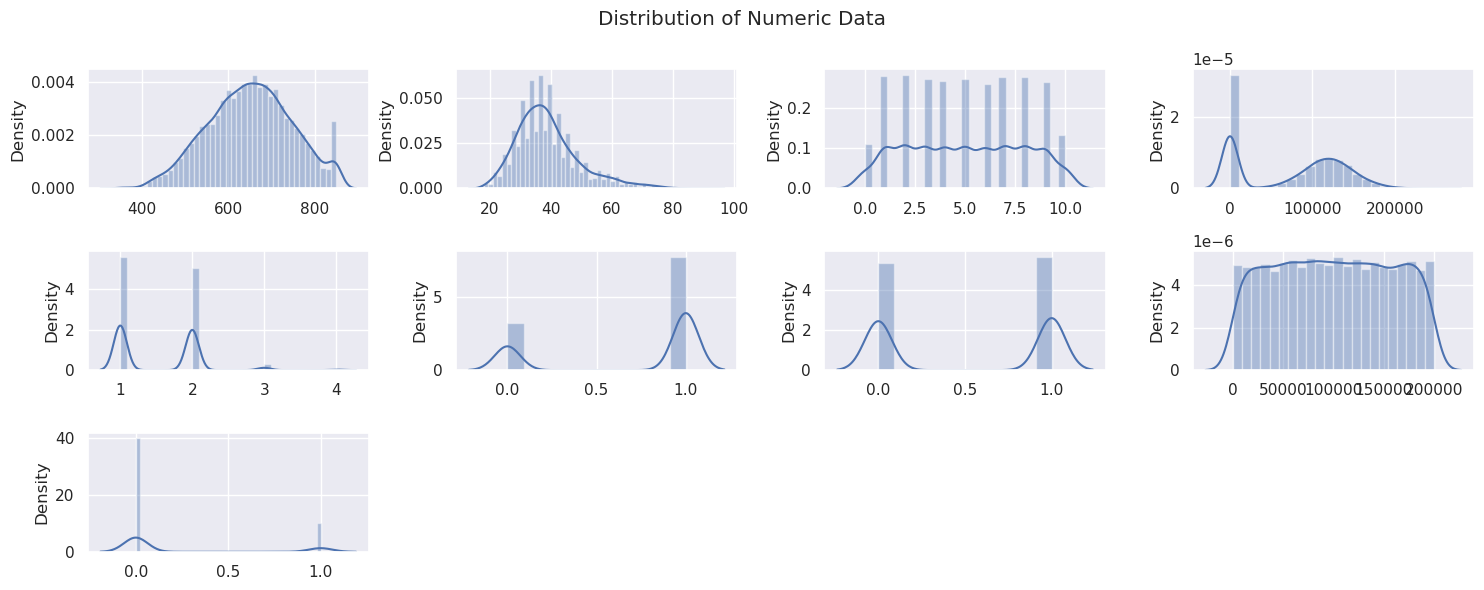

In [14]:
# Check The Distribution Of Numerical Data
try:
    plt.suptitle("Distribution of Numeric Data")
    for i in range(len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

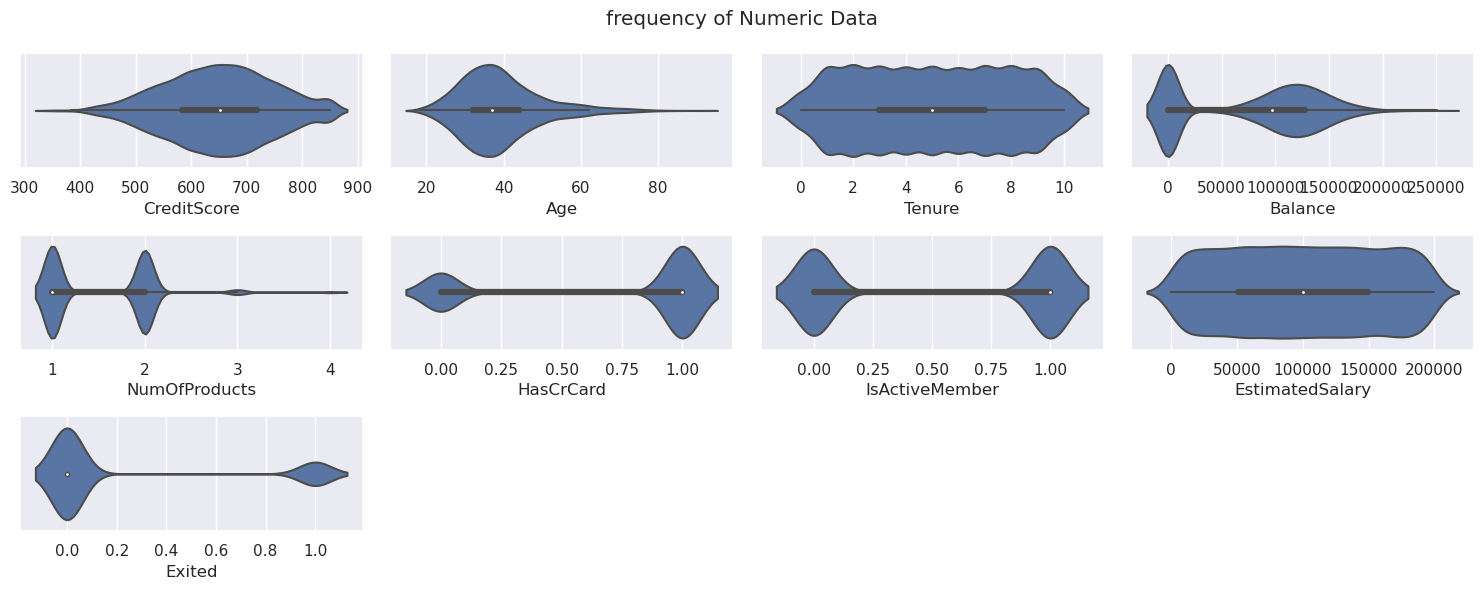

In [15]:
# Check The Distribution Of Numerical Data
try:
    plt.suptitle("frequency of Numeric Data")
    for i in range(len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.violinplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

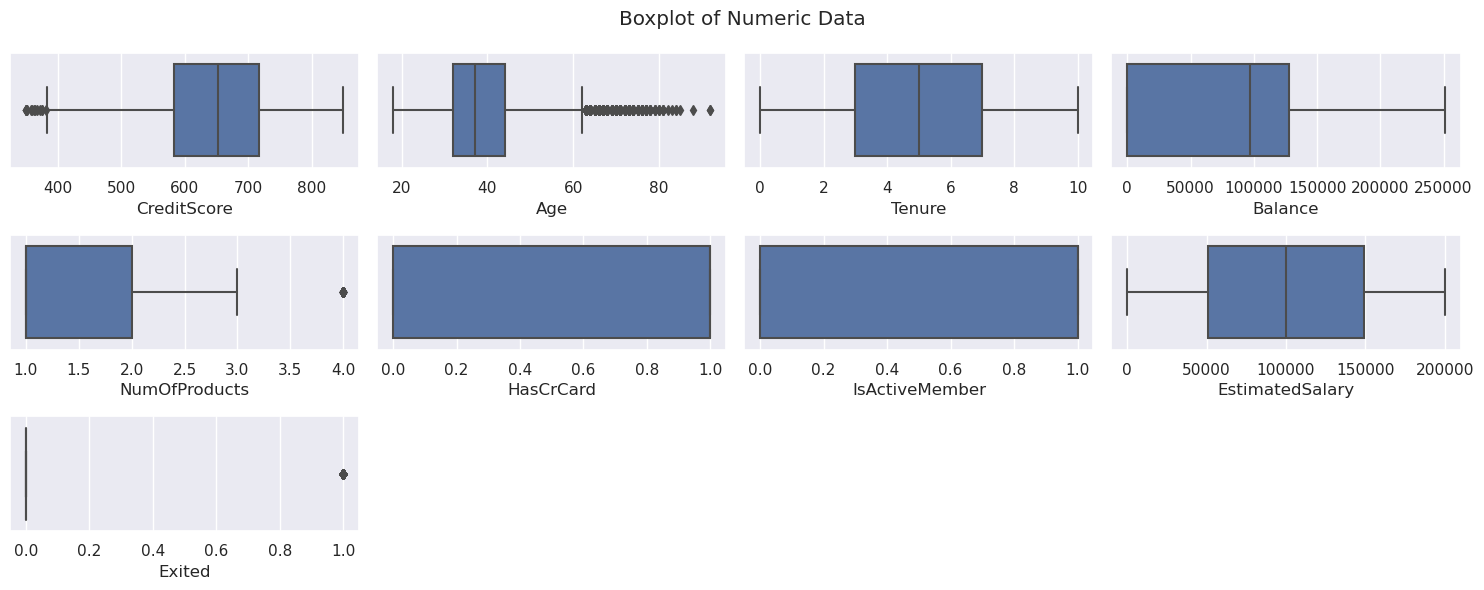

In [16]:
# Check The Distribution Of Numerical Data
try:
    plt.suptitle("Boxplot of Numeric Data")
    for i in range(len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot: xlabel='Geography'>

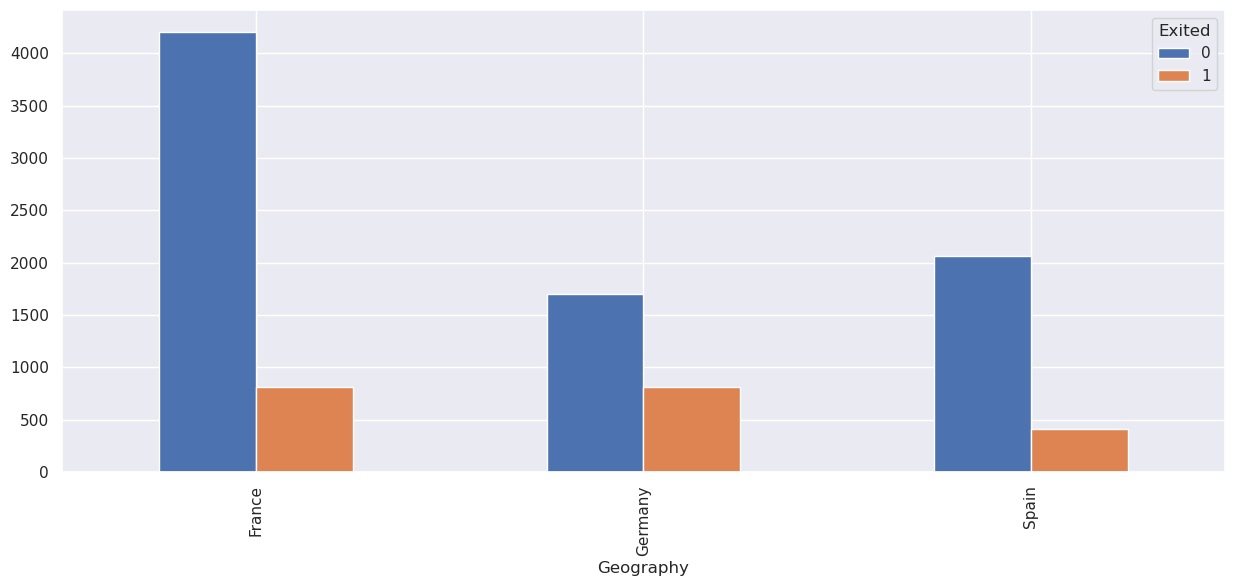

In [17]:
geog = pd.crosstab(data["Geography"],data["Exited"])
geog.plot(kind="bar")

<AxesSubplot: xlabel='Gender'>

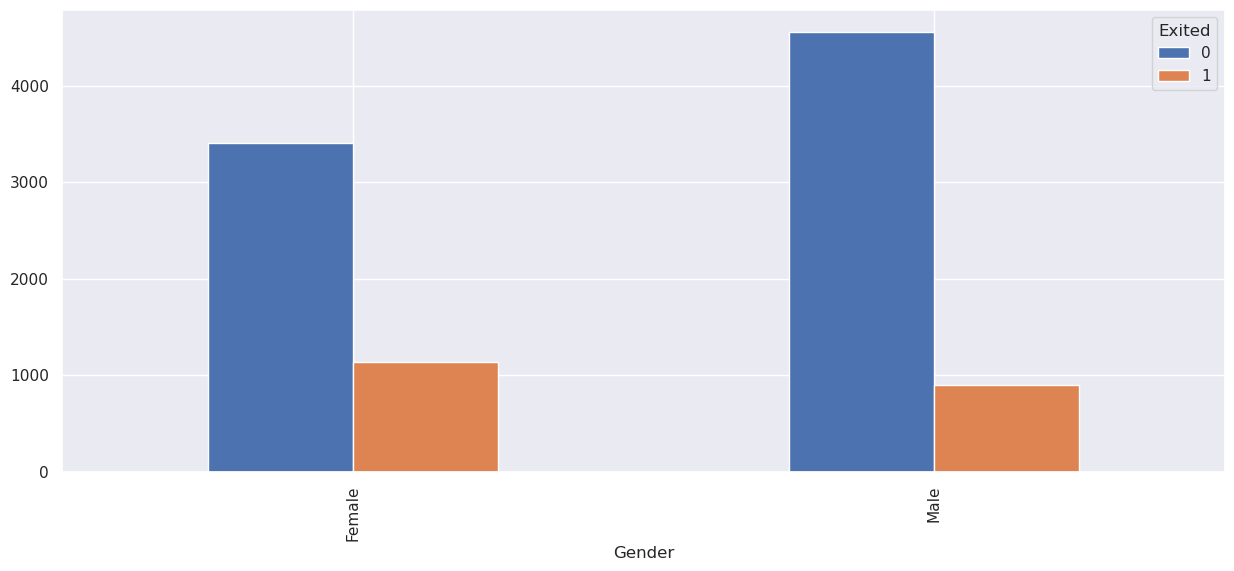

In [18]:
Gender= pd.crosstab(data["Gender"],data["Exited"])
Gender.plot(kind="bar")

<AxesSubplot: xlabel='IsActiveMember'>

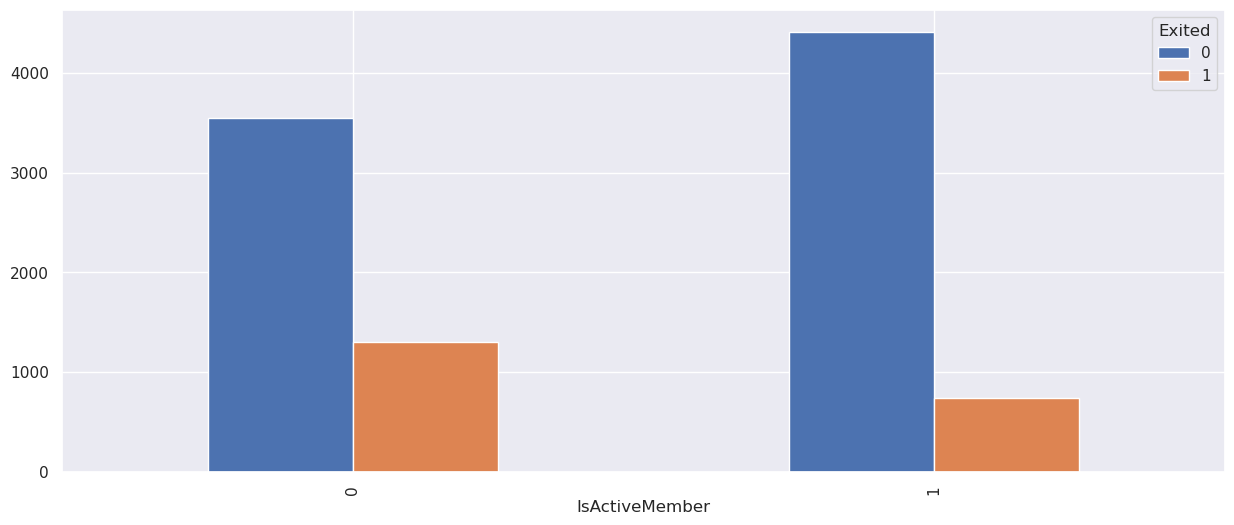

In [19]:
IsActiveMember= pd.crosstab(data["IsActiveMember"],data["Exited"])
IsActiveMember.plot(kind="bar")

<AxesSubplot: xlabel='Tenure'>

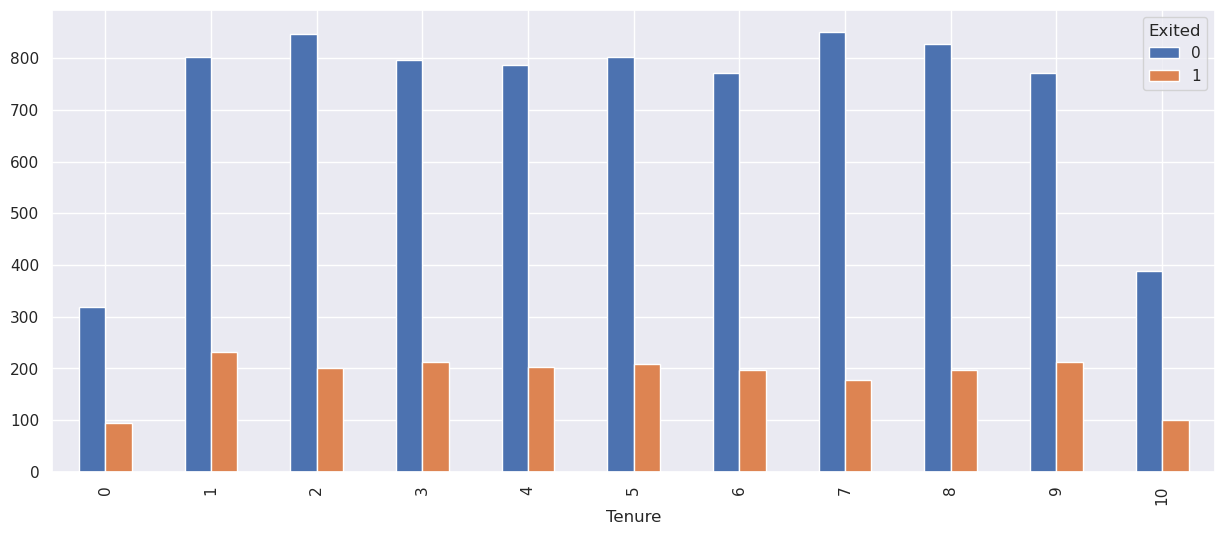

In [20]:
Tenure= pd.crosstab(data["Tenure"],data["Exited"])
Tenure.plot(kind="bar")

In [21]:
## Encodeig Gender 
data["Gender"] = data["Gender"].map({"Female":0,"Male":1})

In [22]:
data.drop("Geography",axis=1,inplace=True)

<AxesSubplot: >

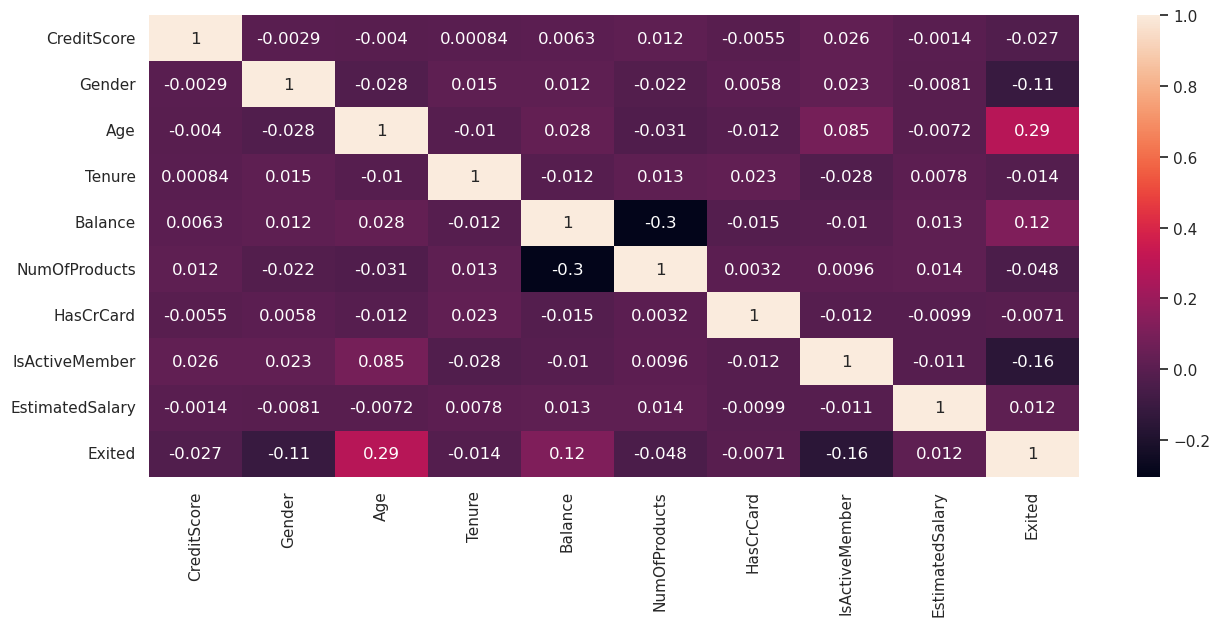

In [23]:
## Check Correlation Of Data
sns.heatmap(data.corr(),annot=True)

## Model Traning

In [24]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1


In [25]:
## Saprate Dependent And indipendent Features
x = data.drop("Exited",axis=1)
y = data["Exited"]

In [26]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [27]:
# saprate numerical colum and catiogerical columns
catigorical_features = x.select_dtypes(include= "object").columns
numerical_features = x.select_dtypes(exclude = "object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [28]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [29]:
## Create Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]     
)

## Catigorical pipline
cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder()),
        ("scaler",StandardScaler())
    ]     
)

## Create Preprocessor Object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [30]:
# ## Adjust Value In imbalance Data
from imblearn.combine import SMOTETomek
resample = SMOTETomek(sampling_strategy='auto')
X,Y = resample.fit_resample(x,y)

In [31]:
print(X.shape)
print(y.shape)

(13736, 9)
(10000,)


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10988, 9)
(2748, 9)
(10988,)
(2748,)


In [35]:
## Apply Preprocessor Object
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [39]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [76]:
model = Sequential()
model.add(Dense(11,activation="sigmoid",input_dim = 9)), #input Layer hidden layer
model.add(Dense(8,activation="sigmoid")), ## hidden
model.add(Dense(5,activation="sigmoid")),
model.add(Dense(1,activation="relu")) # output layer
model.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 11)                110       
                                                                 
 dense_26 (Dense)            (None, 8)                 96        
                                                                 
 dense_27 (Dense)            (None, 5)                 45        
                                                                 
 dense_28 (Dense)            (None, 1)                 6         
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics="accuracy")

In [78]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
344/344 [==============================] - 1s 2ms/step - loss: 1.1278 - accuracy: 0.4995
Epoch 2/100
344/344 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.5002
Epoch 3/100
344/344 [==============================] - 1s 1ms/step - loss: 0.6768 - accuracy: 0.6186
Epoch 4/100
344/344 [==============================] - 0s 1ms/step - loss: 0.6591 - accuracy: 0.7054
Epoch 5/100
344/344 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.7434
Epoch 6/100
344/344 [==============================] - 0s 1ms/step - loss: 0.6053 - accuracy: 0.7566
Epoch 7/100
344/344 [==============================] - 0s 1ms/step - loss: 0.5666 - accuracy: 0.7629
Epoch 8/100
344/344 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7648
Epoch 9/100
344/344 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.7652
Epoch 10/100
344/344 [==============================] - 0s 1ms/step - loss: 0.4854 - accura

In [79]:
y_predict = model.predict(X_test)

86/86 [==============================] - 0s 970us/step


In [80]:
y_predict = y_predict.argmax(axis=-1)

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [82]:
print(f"Accuracy Score: {accuracy_score(y_test,y_predict)}")

Accuracy Score: 0.5018195050946143


In [69]:
print(accuracy_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.5018195050946143
0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1379
           1       0.00      0.00      0.00      1369

    accuracy                           0.50      2748
   macro avg       0.25      0.50      0.33      2748
weighted avg       0.25      0.50      0.34      2748

